<a href="https://colab.research.google.com/github/mcondorimendoza/AI7I/blob/main/CNN_COVIDDetection_V1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!unzip /content/archive-Covid-19_Image_Dataset.zip

Archive:  /content/archive-Covid-19_Image_Dataset.zip
  inflating: Covid19-dataset/test/Covid/0100.jpeg  
  inflating: Covid19-dataset/test/Covid/0102.jpeg  
  inflating: Covid19-dataset/test/Covid/0105.png  
  inflating: Covid19-dataset/test/Covid/0106.jpeg  
  inflating: Covid19-dataset/test/Covid/0108.jpeg  
  inflating: Covid19-dataset/test/Covid/0111.jpg  
  inflating: Covid19-dataset/test/Covid/0112.jpg  
  inflating: Covid19-dataset/test/Covid/0113.jpg  
  inflating: Covid19-dataset/test/Covid/0115.jpeg  
  inflating: Covid19-dataset/test/Covid/0118.jpeg  
  inflating: Covid19-dataset/test/Covid/0119.jpeg  
  inflating: Covid19-dataset/test/Covid/0120.jpg  
  inflating: Covid19-dataset/test/Covid/094.png  
  inflating: Covid19-dataset/test/Covid/096.png  
  inflating: Covid19-dataset/test/Covid/098.jpeg  
  inflating: Covid19-dataset/test/Covid/COVID-00003b.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00012.jpg  
  inflating: Covid19-dataset/test/Covid/COVID-00022.jpg  
 

In [2]:
import os
import glob
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

# Librerías para la visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns

# Para ignorar las advertencias irrelevantes
import warnings
warnings.filterwarnings('ignore')

# Librerías requeridas para el modelamiento de la red neuronal
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, AveragePooling2D
from tensorflow.keras.utils import image_dataset_from_directory

# Otras librerías

import random

In [4]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/Covid19-dataset/train/",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

val_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/Covid19-dataset/test/",
    labels='inferred',
    label_mode='int',
    batch_size=64,
    image_size=(256, 256),
)

Found 251 files belonging to 3 classes.
Found 66 files belonging to 3 classes.


In [5]:
# Creación de la función para la visualización de las imágenes.

def visualize_images(path, num_images=5):

    # Get a list of image filenames
    image_filenames = [f for f in os.listdir(path) if os.path.isfile(os.path.join(path, f))]

    if not image_filenames:
        raise ValueError("No images found in the specified path")

    # Select random images
    selected_images = random.sample(image_filenames, min(num_images, len(image_filenames)))

    # Create a figure and axes
    fig, axes = plt.subplots(1, num_images, figsize=(15, 3), facecolor='white')

    # Display each image
    for i, image_filename in enumerate(selected_images):
        # Load image
        image_path = os.path.join(path, image_filename)
        image = plt.imread(image_path)

        # Display image
        axes[i].imshow(image)
        axes[i].axis('off')
        axes[i].set_title(image_filename)  # Set image filename as title

    # Adjust layout and display
    plt.tight_layout()
    plt.show()


In [6]:
# Extracción de las etiquetas de las clases
classes = train_ds.class_names

In [7]:
classes

['Covid', 'Normal', 'Viral Pneumonia']

COVID


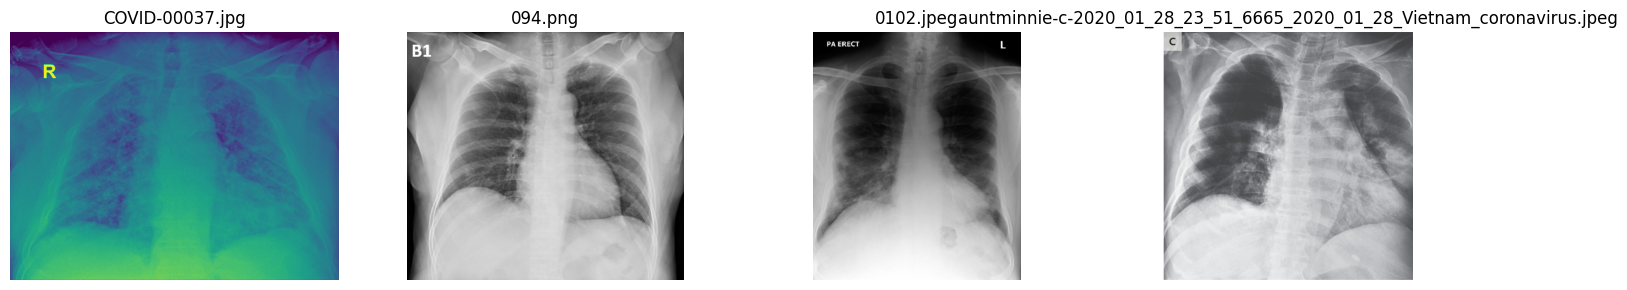

NORMAL


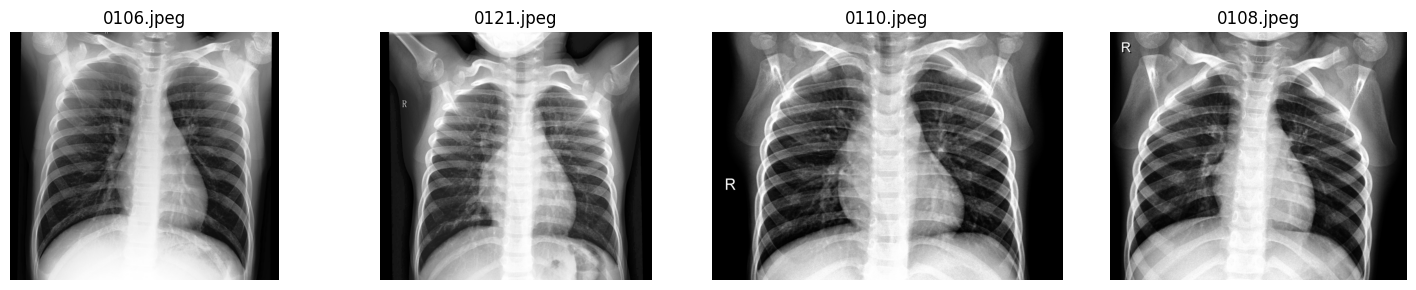

VIRAL PNEUMONIA


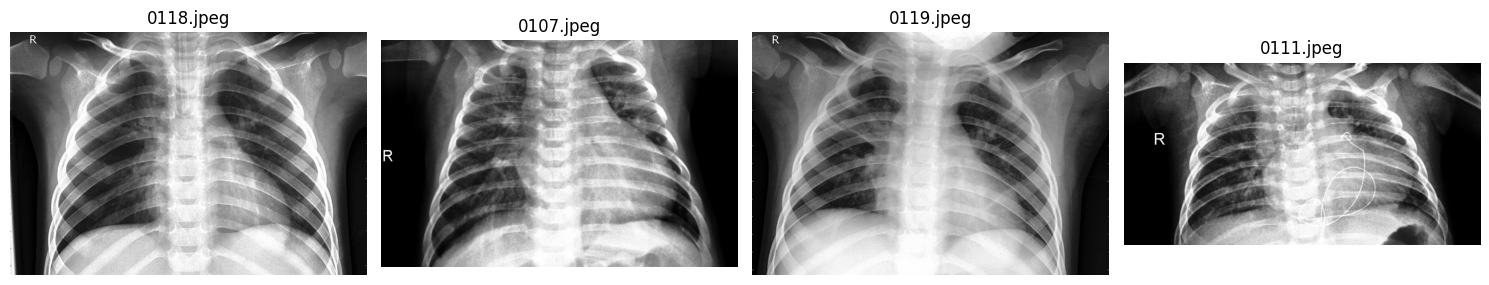

In [8]:
# Iteración en cada clase para plotear sus respectivas imágenes
for label in classes:

    # Especificación de la ruta que contiene las imágenes para su visualización
    path_to_visualize = f"/content/Covid19-dataset/test/{label}"

    # Visualización de 3 conjuntos de imágenes de manera aleatoria
    print(label.upper())
    visualize_images(path_to_visualize, num_images=4)

In [9]:
data_augmentation = keras.Sequential(
  [
    keras.layers.RandomFlip("horizontal",
                      input_shape=(256,
                                  256,
                                  3)),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
  ]
)

In [10]:
#Implementación del modelo secuencial para la red neuronal implementada
model = Sequential()
model.add(data_augmentation)
model.add(Conv2D(32, kernel_size=(3, 3),activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(30, activation='relu'))
model.add(Dense(3, activation='softmax'))

In [11]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 516128)            0         
                                                                 
 dense (Dense)               (None, 30)                15483870  
                                                                 
 dense_1 (Dense)             (None, 3)                 93        
                                                      

In [12]:
# Compilación del modelo
model.compile(optimizer='SGD', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
# Entrenamiento del modelo

history = model.fit(train_ds, epochs=30, validation_data=val_ds, verbose=1)

Epoch 1/30
4/4 [==============================] - 25s 5s/step - loss: 255166.2969 - accuracy: 0.3865 - val_loss: 50581778432.0000 - val_accuracy: 0.3030
Epoch 2/30
4/4 [==============================] - 18s 4s/step - loss: 13572347904.0000 - accuracy: 0.3227 - val_loss: 1.0975 - val_accuracy: 0.3939
Epoch 3/30
4/4 [==============================] - 20s 4s/step - loss: 1.0964 - accuracy: 0.4422 - val_loss: 1.0972 - val_accuracy: 0.3939
Epoch 4/30
4/4 [==============================] - 19s 4s/step - loss: 1.0958 - accuracy: 0.4422 - val_loss: 1.0968 - val_accuracy: 0.3939
Epoch 5/30
4/4 [==============================] - 20s 4s/step - loss: 1.0951 - accuracy: 0.4422 - val_loss: 1.0965 - val_accuracy: 0.3939
Epoch 6/30
4/4 [==============================] - 18s 4s/step - loss: 1.0945 - accuracy: 0.4422 - val_loss: 1.0962 - val_accuracy: 0.3939
Epoch 7/30
4/4 [==============================] - 20s 4s/step - loss: 1.1223 - accuracy: 0.4422 - val_loss: 1.0959 - val_accuracy: 0.3939
Epoch 8/3

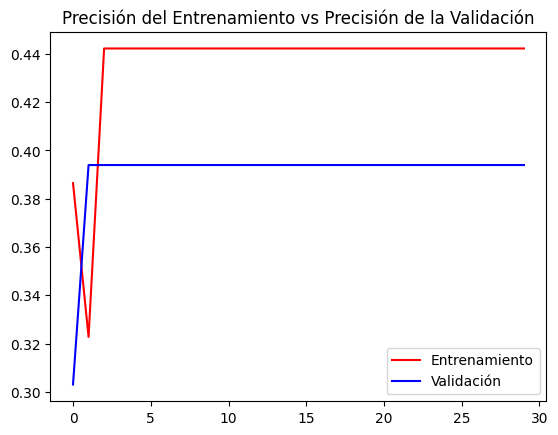

In [14]:
# Ploteado de la gráfica de la precisión del entrenamiento y la validación
plt.title('Precisión del Entrenamiento vs Precisión de la Validación')

plt.plot(history.history['accuracy'], color='red',label='Entrenamiento')
plt.plot(history.history['val_accuracy'], color='blue',label='Validación')

plt.legend()

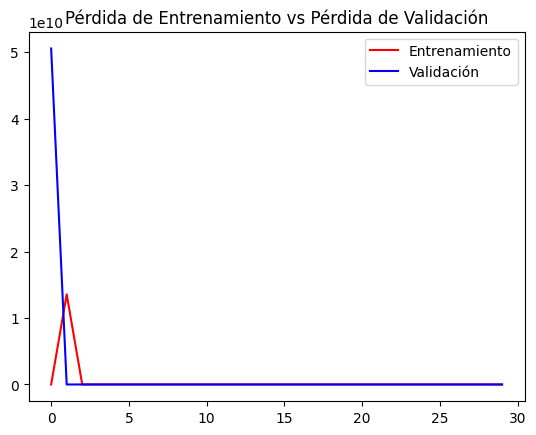

In [15]:
# Ploteado de la gráfica de la pérdida de entrenamiento y la pérdida de la validación
plt.title('Pérdida de Entrenamiento vs Pérdida de Validación')

plt.plot(history.history['loss'], color='red',label='Entrenamiento')
plt.plot(history.history['val_loss'], color='blue',label='Validación')

plt.legend()